# Pruebas del Libro

Para probar si todo esta funcionando correctamente, de modo que pueda usar las libretas del libro, ejecute el siguiente comando:

```shell
  jupyter nbconvert --to notebook --execute Pruebas.ipynb
```

## Variables y rutinas básicas

In [1]:
LOG_DIR=f"log/"
LOG_FILE=f"{LOG_DIR}/pruebas.log"
PYMCEL_DIR=f"pymcel/"
DATA_DIR=f"{PYMCEL_DIR}/data/"
NUM_ERRORS=0
NUM_TESTS=0

def log_message(msg,error=None):
    global NUM_ERRORS,NUM_TESTS
    NUM_TESTS+=1
    os.system(f"echo 'Prueba {NUM_TESTS}: {msg}' |tee -a {LOG_FILE}");
    if error:
        os.system(f"echo 'ERROR: {error}'|tee -a {LOG_FILE}")
        print(error)
        NUM_ERRORS+=1

def test_package(pack):
    try:
        exec(f"import {pack}",globals())
        log_message(f"\'{pack}' Instalado")
    except Exception as e:
        log_message(f"Falta instalar \'{pack}':",e)
        
import os
os.system(f"echo 'Resultado de pruebas:' > {LOG_FILE}");

## Paquetes requeridos

In [3]:
packages=["numpy","scipy","matplotlib","mpl_toolkits.mplot3d"]
for pack in packages:
    test_package(pack)

## Gráficos

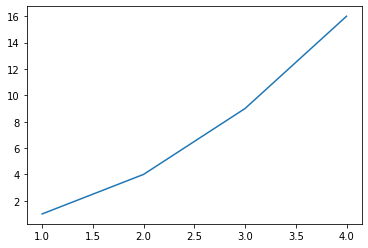

In [4]:
try:
    %matplotlib inline
    from matplotlib.pyplot import plot
    plot([1,2,3,4],[1,4,9,16]);
    log_message("Gráfica exitosa.")
except Exception as e:
    log_message(f"Ocurrio un problema usando matplotlib:",e)

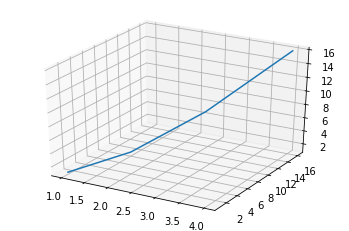

In [5]:
try:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=fig.gca(projection="3d")
    plt.plot([1,2,3,4],[1,4,9,16],[1,4,9,16]);
    log_message("Gráfica en 3d exitosa.")
except Exception as e:
    log_message(f"Ocurrio un problema usando matplotlib en 3d:",e)

## Reporte

In [7]:
log_message(f"Se ejecutaron {NUM_TESTS} prubeas")
log_message(f"De ellas {NUM_ERRORS} fallaron")
os.system(f"echo 'Un resumen del reporte de pruebas está en el archivo \'{LOG_FILE}\''");

In [8]:
!cat $LOG_FILE

Resultado de pruebas:
Prueba 1: numpy Instalado
Prueba 2: scipy Instalado
Prueba 3: matplotlib Instalado
Prueba 4: spiceypy Instalado
Prueba 5: mpl_toolkits.mplot3d Instalado
Prueba 6: numpy Instalado
Prueba 7: scipy Instalado
Prueba 8: matplotlib Instalado
Prueba 9: mpl_toolkits.mplot3d Instalado
Prueba 10: Gráfica exitosa.
Prueba 11: Gráfica en 3d exitosa.
Prueba 12: Se ejecutaron 11 prubeas
Prueba 13: De ellas 0 fallaron
